In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
raw_dataset = pd.read_csv("Data - A1.csv")
raw_dataset

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955
...,...,...
995,0.671672,3.079356
996,-0.615616,0.027487
997,0.259259,1.068320
998,0.119119,0.245188


In [94]:
dataset = raw_dataset
dataset.X = (dataset.X - dataset.X.mean())/dataset.X.std()
dataset

,X,Y
0,1.708680,5.098368
1,1.244722,2.516654
2,-0.697668,0.337961
3,0.185237,0.737320
4,0.597259,-0.780955
...,...,...
995,1.161625,3.079356
996,-1.064679,0.027487
997,0.448377,1.068320
998,0.206011,0.245188


In [95]:
train_dataset = dataset.sample(frac=0.8)
train_dataset

,X,Y
804,-0.133301,0.019339
970,-1.480164,-0.368220
977,-1.428228,-1.432739
493,0.635345,2.065725
417,-1.158163,0.643090
...,...,...
281,-0.586872,1.590887
914,0.967733,1.633674
995,1.161625,3.079356
718,-0.850012,1.216632


In [96]:
test_dataset = dataset.drop(train_dataset.index)
test_dataset

,X,Y
3,0.185237,0.737320
25,0.998894,0.410929
27,-1.372830,-0.031308
28,0.901948,1.116080
50,-0.583409,-0.342496
...,...,...
976,-1.127002,-1.141138
982,-0.358355,1.822338
984,-0.095215,0.723662
992,-0.486463,1.531339


In [97]:
train_data = train_dataset.to_numpy()
test_data = test_dataset.to_numpy()

In [98]:
def polynomial(x, deg):
    input_vector = [1]
    for i in range(deg):
        input_vector.append(pow(x, i+1))
    
    return np.array(input_vector)

In [99]:
def error(data, w):
    sum = 0
    for example in data:
        x = polynomial(example[0], len(w)-1)
        y = example[1]
        h = w.dot(x)
        sum += ((h-y)**2)

    return sum/(2*len(data))


In [100]:
def grad(data, w):
    sum = np.zeros(len(w))
    for example in data:
        x = polynomial(example[0], len(w)-1)
        y = example[1]
        h = w.dot(x)
        sum += (y - h)*x

    return sum

def learn(train_data, test_data, deg, epochs=500, lr=0.0001):
    w = np.zeros(deg+1)
    train_errs = [error(train_data, w)]
    test_errs = [error(test_data, w)]

    for i in range(epochs):
        w += lr*grad(train_data, w)
        train_errs.append(error(train_data, w))
        test_errs.append(error(test_data, w))
    
    return w, np.array(train_errs), np.array(test_errs)

In [101]:
def polynomial_regression(train_data, test_data, n_epochs, learning_rate):
    w = np.empty(9)
    train_errs = np.empty((9, n_epochs+1))
    test_errs = np.empty((9, n_epochs+1))
    final_train_errs = np.empty(9)
    final_test_errs = np.empty(9)

    for deg in range(1, 10):
        w, train_errs[deg-1], test_errs[deg-1] = learn(train_data, test_data, deg, epochs=n_epochs, lr=learning_rate)
        final_train_errs[deg-1] = train_errs[deg-1][-1]
        final_test_errs[deg-1] = test_errs[deg-1][-1]
    
    return train_errs, test_errs, final_train_errs, final_test_errs

def prediction(X, w, deg):
    y_pred = []
    for x in X:
        x = polynomial(x, deg)
        h = w.dot(x)
        y_pred.append(h)

    return np.array(y_pred)

In [102]:
train_errs, test_errs, final_train_errs, final_test_errs = polynomial_regression(train_data, test_data, 500, 0.000001)

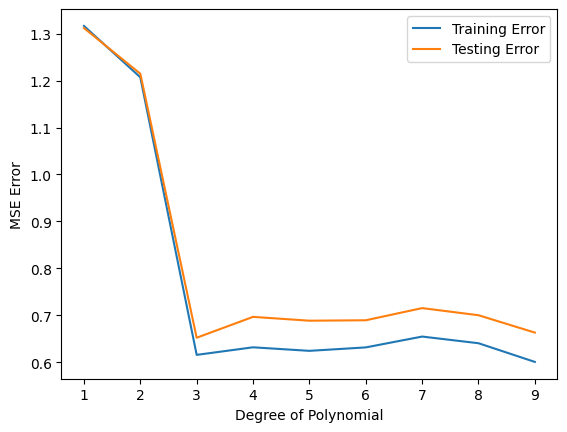

In [87]:
plt.plot(range(1, 10), final_train_errs, label='Training Error')
plt.plot(range(1, 10), final_test_errs, label='Testing Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE Error')
plt.legend()
plt.show()

In [88]:
print(np.argmin(final_test_errs)+1, np.min(final_test_errs))
print(np.argmin(final_train_errs)+1, np.min(final_train_errs))

3 0.6520296952094184
9 0.6004761253769405


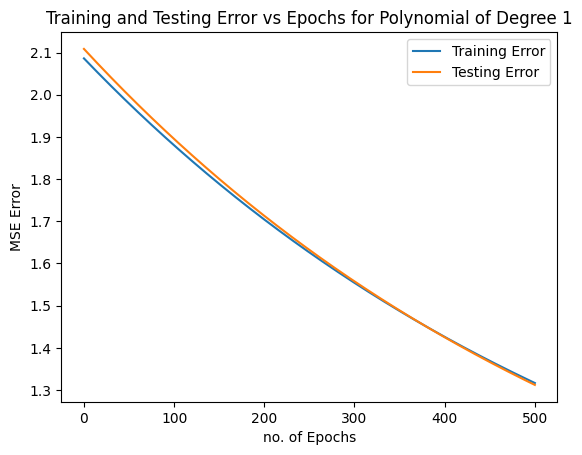

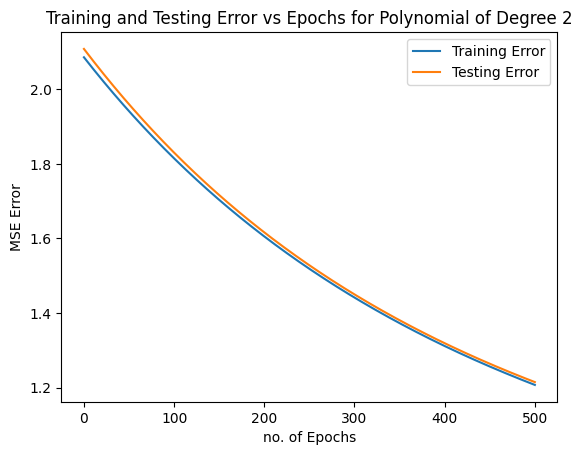

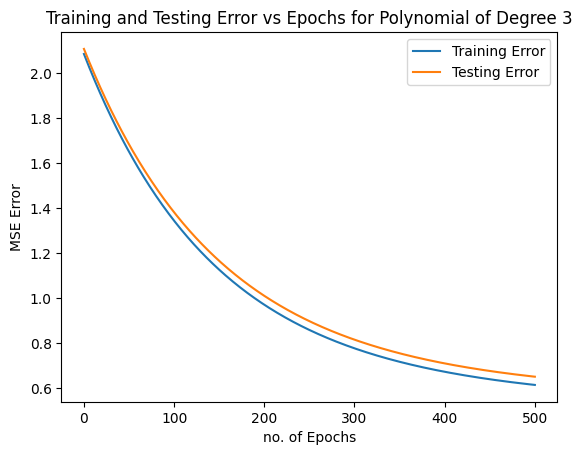

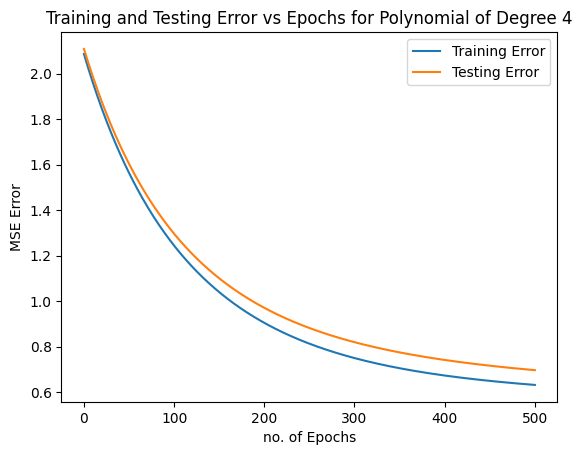

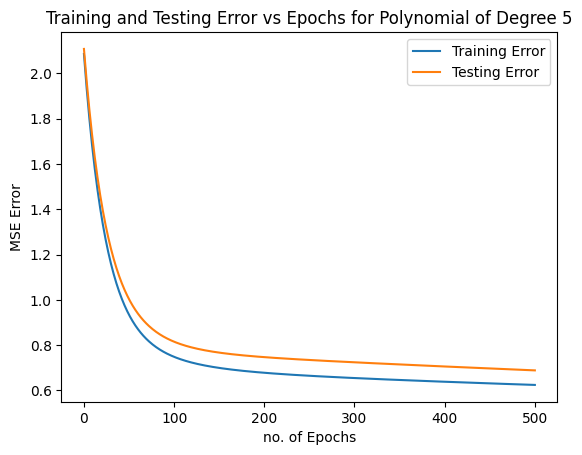

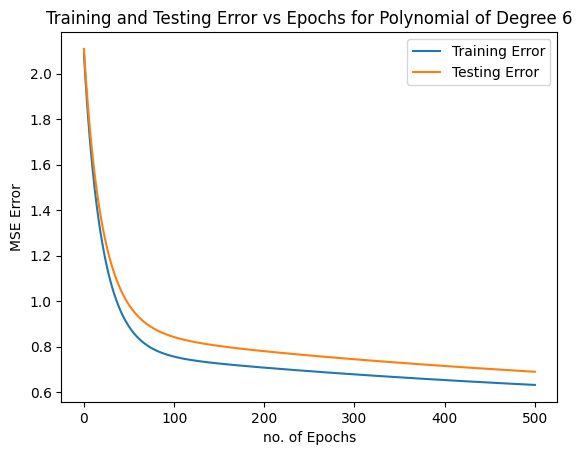

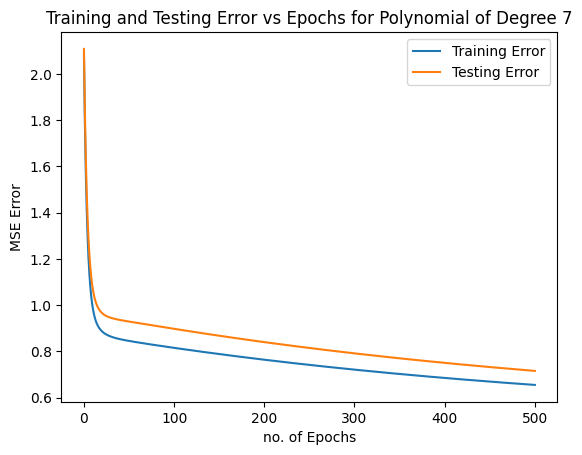

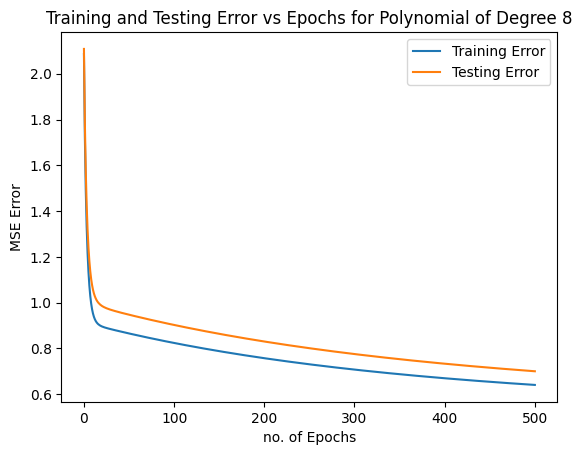

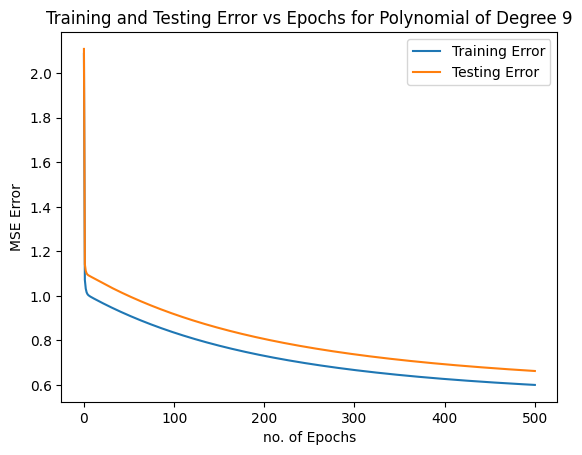

In [90]:
for i in range(9):
    plt.plot(range(len(train_errs[i])), train_errs[i], label='Training Error')
    plt.plot(range(len(test_errs[i])), test_errs[i], label = 'Testing Error')
    plt.title(f'Training and Testing Error vs Epochs for Polynomial of Degree {i+1}')
    plt.xlabel('no. of Epochs')
    plt.ylabel('MSE Error')
    plt.legend()
    plt.show()

In [103]:
w, train_data, test_data = learn(train_data, test_data, 3, 2000, 0.0001)

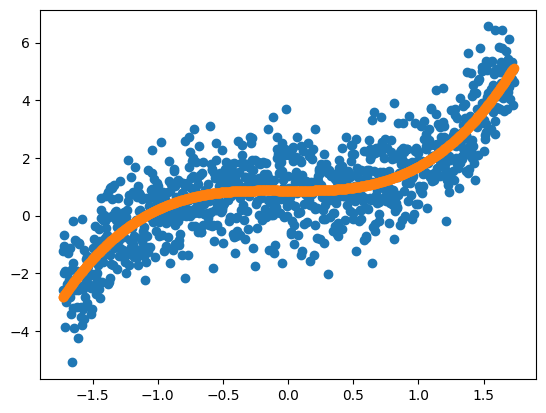

In [105]:
x_actual = dataset.X.to_numpy()
y_actual = dataset.Y.to_numpy()
y_pred = prediction(x_actual, w, 3)
plt.scatter(x_actual, y_actual)
plt.scatter(x_actual, y_pred)


(1000,)